In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longitude comboinations
lat = np.random.uniform(low=-90.000,high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high = 180.000, size = 1500)
lat_lng = zip(lat,lngs)
lat_lng

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lng)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

grand river south east mu
jalu ly
lagoa pt
nikolskoye ru
mar del plata ar
komsomolskiy ru
langenburg ca
mataura pf
beyneu kz
ballina au
oussouye sn
doksy cz
aykhal ru
bethel us
tukrah ly
babstovo ru
lebu cl
hermanus za
khandyga ru
pacific grove us
illoqqortoormiut gl
ribeira grande pt
jiayuguan cn
arraial do cabo br
kodiak us
nanortalik gl
barcelos br
sao filipe cv
tiep ph
ushuaia ar
mizque bo
alice springs au
kapaa us
moree au
vaini to
torbay ca
cape town za
butembo cd
taolanaro mg
georgetown sh
ribeira grande pt
khromtau kz
albany au
pisco pe
auki sb
rikitea pf
changchun cn
mar del plata ar
darhan mn
port lincoln au
vila franca do campo pt
busselton au
rikitea pf
luderitz na
young uy
port hedland au
port elizabeth za
cidreira br
khatanga ru
thompson ca
rudnyy ru
rio gallegos ar
port hardy ca
port elizabeth za
los llanos de aridane es
kapaa us
cape town za
hobart au
albany au
ancud cl
port hardy ca
hambantota lk
pangnirtung ca
bathsheba bb
pevek ru
haines junction ca
monteagudo bo
sou

faanui pf
port hardy ca
torbay ca
lorengau pg
puerto ayora ec
punta arenas cl
muros es
vanimo pg
busselton au
amahai id
hulan cn
sao filipe cv
yeppoon au
thompson ca
geraldton au
busselton au
mataura pf
tuktoyaktuk ca
mataura pf
terrace bay ca
katsuura jp
ushuaia ar
bredasdorp za
norman wells ca
vaini to
yellowknife ca
avarua ck
puerto ayora ec
broome au
necochea ar
georgetown sh
bathsheba bb
rikitea pf
vaini to
lompoc us
frontera mx
amuntai id
kiama au
san carlos de bariloche ar
hilo us
guanare ve
shubarkuduk kz
chokurdakh ru
arraial do cabo br
juifang tw
zhanaozen kz
busselton au
nizhneyansk ru
punta arenas cl
provideniya ru
tessalit ml
punta arenas cl
vitre fr
rikitea pf
aklavik ca
hobyo so
port augusta au
mataura pf
chuy uy
bengkulu id
yellowknife ca
quatre cocos mu
punta arenas cl
albany au
qaanaaq gl
albany au
kaitangata nz
torbay ca
fortuna us
bluff nz
chokurdakh ru
port alfred za
airai pw
omaruru na
airai pw
punta arenas cl
ponta do sol cv
punta arenas cl
lamar us
dicabisagan p

simao cn
butaritari ki
hermanus za
hilo us
vaini to
jamestown sh
port elizabeth za
richards bay za
rikitea pf
vostok ru
cape town za
bluff nz
daru pg
trinidad cu
pyay mm
pimentel pe
labytnangi ru
hermanus za
georgetown sh
mar del plata ar
jamestown sh
barrow us
chapais ca
kazalinsk kz
jamestown sh
chapais ca
ushuaia ar
shirokiy ru
butaritari ki
byron bay au
ayan ru
saint george bm
bambous virieux mu
arraial do cabo br


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c94870f136fc2b308352e1a0af3bf991


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | jalu
Processing Record 3 of Set 1 | lagoa
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | komsomolskiy
Processing Record 7 of Set 1 | langenburg
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | beyneu
Processing Record 10 of Set 1 | ballina
Processing Record 11 of Set 1 | oussouye
Processing Record 12 of Set 1 | doksy
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | tukrah
Processing Record 16 of Set 1 | babstovo
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | khandyga
Processing Record 20 of Set 1 | pacific grove
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Recor

Processing Record 40 of Set 4 | kamenka
Processing Record 41 of Set 4 | dibaya
City not found. Skipping...
Processing Record 42 of Set 4 | balikpapan
Processing Record 43 of Set 4 | mezdra
Processing Record 44 of Set 4 | marathon
Processing Record 45 of Set 4 | cam ranh
Processing Record 46 of Set 4 | ongole
Processing Record 47 of Set 4 | palmas bellas
Processing Record 48 of Set 4 | chumikan
Processing Record 49 of Set 4 | omboue
Processing Record 50 of Set 4 | bom jesus dos perdoes
Processing Record 1 of Set 5 | namatanai
Processing Record 2 of Set 5 | camocim
Processing Record 3 of Set 5 | samusu
City not found. Skipping...
Processing Record 4 of Set 5 | damaturu
Processing Record 5 of Set 5 | xian
Processing Record 6 of Set 5 | saint-philippe
Processing Record 7 of Set 5 | san vicente
Processing Record 8 of Set 5 | pilot butte
Processing Record 9 of Set 5 | tebingtinggi
Processing Record 10 of Set 5 | itagi
Processing Record 11 of Set 5 | ossora
Processing Record 12 of Set 5 | kat

Processing Record 30 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 31 of Set 8 | mentakab
Processing Record 32 of Set 8 | norrtalje
Processing Record 33 of Set 8 | tura
Processing Record 34 of Set 8 | pasco
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | kavieng
Processing Record 37 of Set 8 | srednekolymsk
Processing Record 38 of Set 8 | russell
Processing Record 39 of Set 8 | sept-iles
Processing Record 40 of Set 8 | bilibino
Processing Record 41 of Set 8 | comodoro rivadavia
Processing Record 42 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 43 of Set 8 | yuncheng
Processing Record 44 of Set 8 | porto murtinho
Processing Record 45 of Set 8 | tekirdag
Processing Record 46 of Set 8 | smidovich
Processing Record 47 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 8 | jinsha
Processing Record 49 of Set 8 | miyako
Processing Record 50 of Set 8 | vikhorevka
Processing Record 1 of Set 9 | entre 

Processing Record 17 of Set 12 | ler
Processing Record 18 of Set 12 | sangar
Processing Record 19 of Set 12 | watsa
Processing Record 20 of Set 12 | hong gai
Processing Record 21 of Set 12 | surt
Processing Record 22 of Set 12 | newport
Processing Record 23 of Set 12 | salinas
Processing Record 24 of Set 12 | bajil
Processing Record 25 of Set 12 | sur
Processing Record 26 of Set 12 | chandur bazar
Processing Record 27 of Set 12 | upington
Processing Record 28 of Set 12 | wewak
Processing Record 29 of Set 12 | shingu
Processing Record 30 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 31 of Set 12 | korla
Processing Record 32 of Set 12 | gerede
Processing Record 33 of Set 12 | lufkin
Processing Record 34 of Set 12 | mayo
Processing Record 35 of Set 12 | kirakira
Processing Record 36 of Set 12 | kyren
Processing Record 37 of Set 12 | simao
Processing Record 38 of Set 12 | trinidad
Processing Record 39 of Set 12 | pyay
Processing Record 40 of Set 12 | pimentel
Proc

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jalu,29.0331,21.5482,81.63,14,0,12.12,LY,2021-04-07 15:17:15
1,Lagoa,39.0500,-27.9833,59.99,88,8,14.09,PT,2021-04-07 15:17:16
2,Nikolskoye,59.7035,30.7861,42.80,45,0,6.71,RU,2021-04-07 15:17:16
3,Mar Del Plata,-38.0023,-57.5575,78.01,94,90,9.22,AR,2021-04-07 15:12:35
4,Komsomolskiy,40.4272,71.7189,57.20,44,51,6.91,UZ,2021-04-07 15:17:17
5,Langenburg,49.2544,9.8458,34.00,75,90,21.85,DE,2021-04-07 15:17:17
6,Mataura,-46.1927,168.8643,48.00,95,28,1.90,NZ,2021-04-07 15:17:17
7,Beyneu,45.3167,55.2000,58.59,36,44,2.17,KZ,2021-04-07 15:17:18
8,Ballina,-28.8667,153.5667,69.80,94,90,11.50,AU,2021-04-07 15:14:46
9,Oussouye,12.4850,-16.5469,102.20,69,0,6.91,SN,2021-04-07 15:17:18


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_newC_df = city_data_df[new_column_order]
city_data_newC_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jalu,LY,2021-04-07 15:17:15,29.0331,21.5482,81.63,14,0,12.12
1,Lagoa,PT,2021-04-07 15:17:16,39.0500,-27.9833,59.99,88,8,14.09
2,Nikolskoye,RU,2021-04-07 15:17:16,59.7035,30.7861,42.80,45,0,6.71
3,Mar Del Plata,AR,2021-04-07 15:12:35,-38.0023,-57.5575,78.01,94,90,9.22
4,Komsomolskiy,UZ,2021-04-07 15:17:17,40.4272,71.7189,57.20,44,51,6.91


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1617808871.6884792

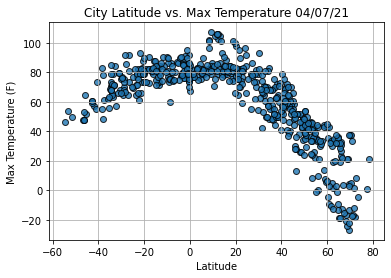

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

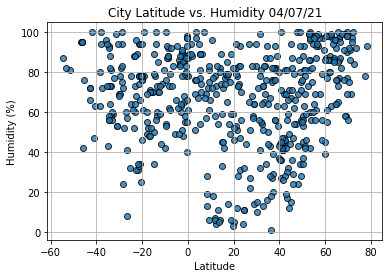

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

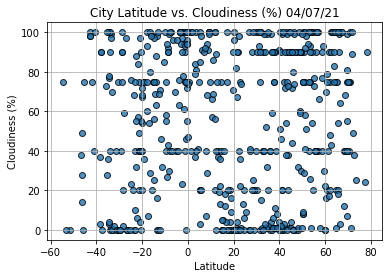

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

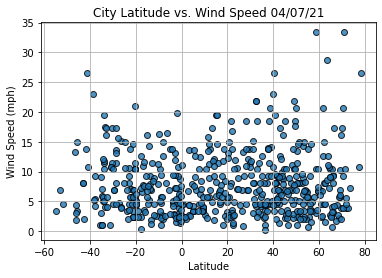

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                       Tukrah
Lat                       32.5341
Lng                       20.5791
Max Temp                    64.78
Humidity                       54
Cloudiness                      0
Wind Speed                    6.6
Country                        LY
Date          2021-04-07 15:17:19
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
544    False
545     True
546     True
547     True
548     True
Name: Lat, Length: 549, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jalu,29.0331,21.5482,81.63,14,0,12.12,LY,2021-04-07 15:17:15
1,Lagoa,39.0500,-27.9833,59.99,88,8,14.09,PT,2021-04-07 15:17:16
2,Nikolskoye,59.7035,30.7861,42.80,45,0,6.71,RU,2021-04-07 15:17:16
4,Komsomolskiy,40.4272,71.7189,57.20,44,51,6.91,UZ,2021-04-07 15:17:17
5,Langenburg,49.2544,9.8458,34.00,75,90,21.85,DE,2021-04-07 15:17:17


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

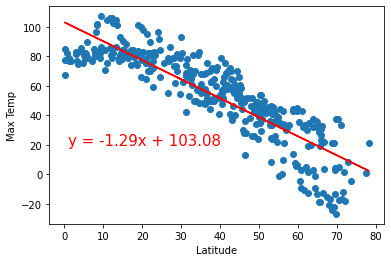

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(1,20))

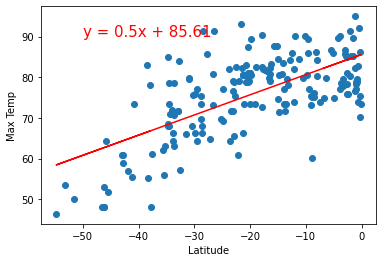

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

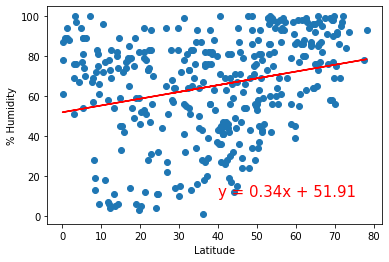

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

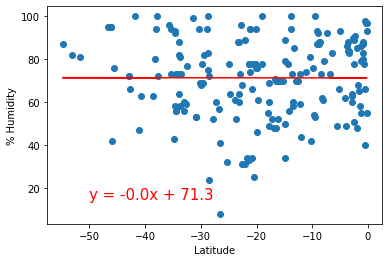

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

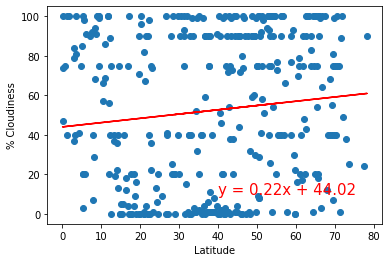

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

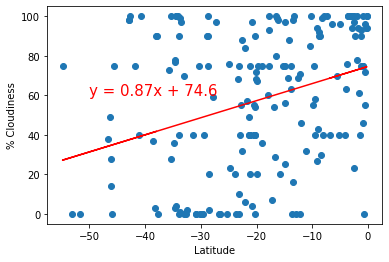

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

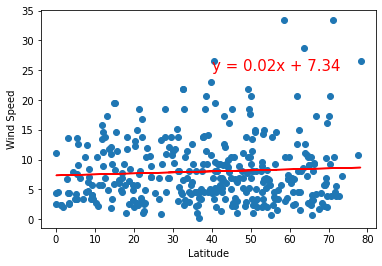

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

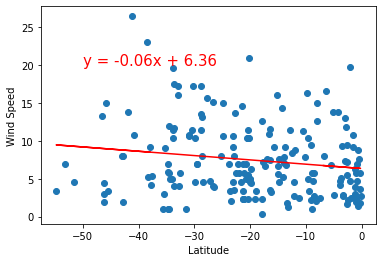

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))